In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import os

#Formateo los datos de infectados
filePath = "D:/Github/05-Procesamiento-de-Señales/analisis-vacunas/data/dataset_casos_covid_CABA.csv"
infectados = pd.read_csv(filePath, parse_dates=['fecha_clasificacion'])

# def setRangoEtario(edad):
#     if edad < 30:
#         return '30 o menos'
#     elif edad < 40:
#         return '31 a 40'
#     elif edad < 50:
#         return '41 a 50'
#     elif edad < 60:
#         return '51 a 60'
#     elif edad < 70:
#         return '61 a 70'
#     elif edad < 80:
#         return '71 a 80'
#     elif edad < 90:
#         return '81 a 90'
#     else :
#         return '91 o mas'

# infectados['grupo_etario'] = infectados.apply(lambda x: setRangoEtario(x['edad']), axis=1)

# infectados['fecha_clasificacion'] = pd.to_datetime(infectados['fecha_clasificacion'], format='%d%b%Y:%H:%M:%S.%f')

In [2]:
#Formateo los datos de vacunados
vacunados = pd.read_csv("D:/Github/05-Procesamiento-de-Señales/analisis-vacunas/data/dataset_total_vacunas.csv")
vacunados['FECHA_ADMINISTRACION'] = pd.to_datetime(vacunados['FECHA_ADMINISTRACION'], format='%d%b%Y:%H:%M:%S')
# vacunados.head()
# vacunados.info()

<AxesSubplot:xlabel='fecha_clasificacion'>

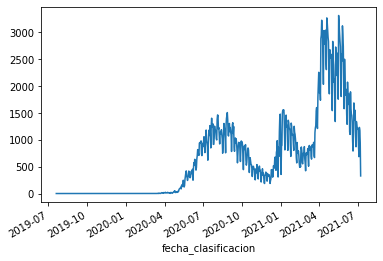

In [3]:
#Infectados => Cantidad por día
infectadosPorDia = infectados.groupby("fecha_clasificacion")["numero_de_caso"].count()
infectadosPorDia.plot(kind="line")

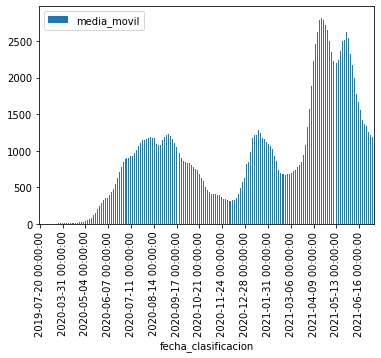

In [4]:
#Infectados => Cálculo de media móvil
#media móvil

tamañoVentana = 14
infectadosPorDiaDF = infectadosPorDia.reset_index().rename(columns={'numero_de_caso': 'count'})
infectadosPorDiaDF["media_movil"] = infectadosPorDiaDF["count"].rolling(tamañoVentana).mean()

infectadosPorDiaDF[['fecha_clasificacion', 'media_movil']].head(20)

infectadosPorDiaDF[['fecha_clasificacion', 'media_movil']].plot(y='media_movil', x='fecha_clasificacion', kind="bar").locator_params(axis="x", nbins=15)

<ipython-input-5-41d5440c4d63>:2: UserWarning: 'set_params()' not defined for locator of type <class 'pandas.plotting._matplotlib.converter.PandasAutoDateLocator'>
  infectadosPorDiaDF.plot(x='fecha_clasificacion', kind="line").locator_params(axis="x", nbins=15)


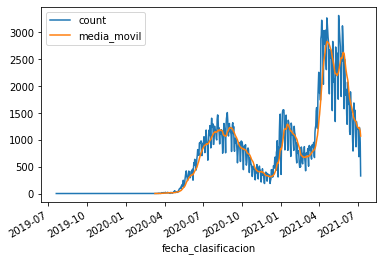

In [5]:
#Infectados => cantidades diarias + media móvil
infectadosPorDiaDF.plot(x='fecha_clasificacion', kind="line").locator_params(axis="x", nbins=15)

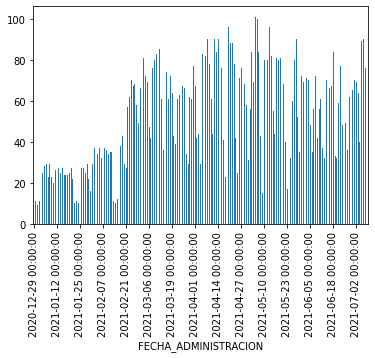

In [6]:
#Vacunados => cantidad por día
vacunadosPorDia = vacunados.groupby(["FECHA_ADMINISTRACION"])["GRUPO_ETARIO"].count()
vacunadosPorDia.plot(kind="bar").locator_params(axis="x", nbins=15)

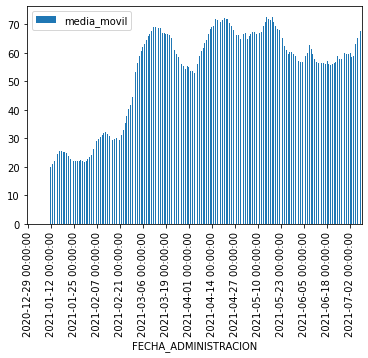

In [7]:
#Vacunad => Cálculo de media móvil
#media móvil
vacunadosPorDia.head()
tamañoVentana = 14
vacunadosPorDiaDF = vacunadosPorDia.reset_index().rename(columns={'GRUPO_ETARIO': 'count'})
# vacunadosPorDiaDF.head()
vacunadosPorDiaDF["media_movil"] = vacunadosPorDiaDF["count"].rolling(tamañoVentana).mean()
# vacunadosPorDiaDF.head(20)
vacunadosPorDiaDF[['FECHA_ADMINISTRACION', 'media_movil']].head(20)

vacunadosPorDiaDF[['FECHA_ADMINISTRACION', 'media_movil']].plot(y='media_movil', x='FECHA_ADMINISTRACION', kind="bar").locator_params(axis="x", nbins=15)

<ipython-input-8-57806358f355>:1: UserWarning: 'set_params()' not defined for locator of type <class 'pandas.plotting._matplotlib.converter.PandasAutoDateLocator'>
  vacunadosPorDiaDF.plot(x='FECHA_ADMINISTRACION', kind="line").locator_params(axis="x", nbins=15)


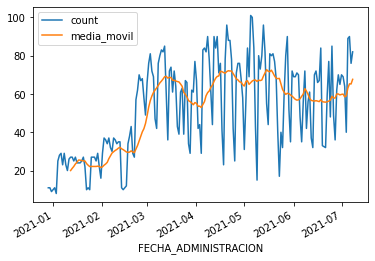

In [8]:
vacunadosPorDiaDF.plot(x='FECHA_ADMINISTRACION', kind="line").locator_params(axis="x", nbins=15)

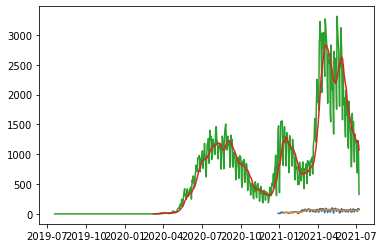

In [9]:
plt.plot(vacunadosPorDiaDF['FECHA_ADMINISTRACION'], vacunadosPorDiaDF['count'])
plt.plot(vacunadosPorDiaDF['FECHA_ADMINISTRACION'], vacunadosPorDiaDF['media_movil'])

plt.plot(infectadosPorDiaDF['fecha_clasificacion'], infectadosPorDiaDF['count'])
plt.plot(infectadosPorDiaDF['fecha_clasificacion'], infectadosPorDiaDF['media_movil'])
plt.show()
# vacunadosPorDiaDF.head()
# infectadosPorDiaDF.head()